# CSC5610 Final - Water Potability Analysis

Authors: **Jacob Buysse**, **Andrew Cook**, **Josh Grant**

## Part 1 - Data Cleaning

Data Source: https://data.ca.gov/dataset/water-quality-data/resource/a284b69b-37d5-491b-80a9-938aea54f44e

For this we will be using the following libraries...

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
from potable import is_potable

We will configure our plots for readable labels, high resolution, and automatic layout.

In [2]:
plt.rc("axes", labelsize=18)
plt.rc("figure", dpi=150, autolayout=True)

Let us load the lab results and view the head/info/describe results.

In [3]:
df = pd.read_csv("./lab_results.csv")
df.head()

,station_id,station_name,full_station_name,station_number,station_type,latitude,longitude,status,county_name,sample_code,sample_date,sample_depth,sample_depth_units,parameter,result,reporting_limit,units,method_name
0,8135,01S04E32C001M,01S04E32C001M,01S04E32C001M,Groundwater,37.8073,-121.5617,"Public, Review Status Unknown",Alameda,WDIS_0719152,05/03/1967 09:00,NaN,Feet,Conductance,3480,1.0,uS/cm,EPA 120.1
1,8135,01S04E32C001M,01S04E32C001M,01S04E32C001M,Groundwater,37.8073,-121.5617,"Public, Review Status Unknown",Alameda,WDIS_0719152,05/03/1967 09:00,NaN,Feet,Dissolved Boron,7.7,0.1,mg/L,"Std Method 4500-B, C"
2,8135,01S04E32C001M,01S04E32C001M,01S04E32C001M,Groundwater,37.8073,-121.5617,"Public, Review Status Unknown",Alameda,WDIS_0719152,05/03/1967 09:00,NaN,Feet,Dissolved Calcium,68,1.0,mg/L,EPA 215.2
3,8135,01S04E32C001M,01S04E32C001M,01S04E32C001M,Groundwater,37.8073,-121.5617,"Public, Review Status Unknown",Alameda,WDIS_0719152,05/03/1967 09:00,NaN,Feet,Dissolved Chloride,758,0.1,mg/L,"Std Method 4500-Cl, B"
4,8135,01S04E32C001M,01S04E32C001M,01S04E32C001M,Groundwater,37.8073,-121.5617,"Public, Review Status Unknown",Alameda,WDIS_0719152,05/03/1967 09:00,NaN,Feet,Dissolved Magnesium,59,0.1,mg/L,"Std Method 3500-Mg, E"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4604610 entries, 0 to 4604609
Data columns (total 18 columns):
 #   Column              Dtype  
---  ------              -----  
 0   station_id          int64  
 1   station_name        object 
 2   full_station_name   object 
 3   station_number      object 
 4   station_type        object 
 5   latitude            float64
 6   longitude           float64
 7   status              object 
 8   county_name         object 
 9   sample_code         object 
 10  sample_date         object 
 11  sample_depth        float64
 12  sample_depth_units  object 
 13  parameter           object 
 14  result              object 
 15  reporting_limit     float64
 16  units               object 
 17  method_name         object 
dtypes: float64(4), int64(1), object(13)
memory usage: 632.3+ MB


In [5]:
df.describe()

,station_id,latitude,longitude,sample_depth,reporting_limit
count,4.604610e+06,4.466527e+06,4.466527e+06,1.821849e+06,4.587145e+06
mean,1.581010e+04,3.692224e+01,-1.192331e+02,6.326068e+00,7.633552e-01
std,1.676235e+04,2.421692e+00,1.546794e+01,4.031159e+01,8.556719e+00
min,1.000000e+00,3.254170e+01,-1.244006e+02,-3.500000e-01,0.000000e+00
25%,1.726000e+03,3.433600e+01,-1.217089e+02,1.500000e-01,1.000000e-01
50%,6.553000e+03,3.740720e+01,-1.210151e+02,1.000000e+00,5.000000e-01
75%,2.846800e+04,3.880590e+01,-1.183674e+02,1.000000e+00,1.000000e+00
max,4.801500e+04,4.203440e+01,1.214820e+02,1.210000e+03,1.000000e+04


We have 4.6M rows of data.  Let us do a cursory analysis of the fields.

In [6]:
print(f"Distinct Station IDs: {df.station_id.nunique()}")
print(f"Samples taken at station 1: {df[df.station_id == 1].sample_code.nunique()}")
parameters = df.parameter.unique()
print(f"Distinct parameters per sample: {len(parameters)}")
parameters

Distinct Station IDs: 44321
Samples taken at station 1: 713
Distinct parameters per sample: 437


array(['Conductance', 'Dissolved Boron', 'Dissolved Calcium',
       'Dissolved Chloride', 'Dissolved Magnesium', 'Dissolved Sodium',
       'Total Alkalinity', 'Total Hardness', 'pH', 'Dissolved Hardness',
       'Dissolved Potassium', 'Dissolved Sulfate',
       'Total Dissolved Solids', '*No Lab Analyses (Field Measures Only)',
       'Dissolved Nitrate', 'Dissolved Fluoride', 'Total Copper',
       'Total Iron', 'Total Manganese', 'Total Zinc', 'Total Arsenic',
       'Total Lead', 'Dissolved Silica (SiO2)', 'Total Chromium',
       'Total Lithium', 'Total Strontium', 'Total Barium',
       'Total Cadmium', 'Total Chromium, hexavalent (Cr6+)',
       'Total Mercury', 'Total Selenium', 'Total Silver', 'Color',
       'Dissolved Iodide', 'Methylene Blue Active Substances (MBAS)',
       'Threshold Odor', 'Turbidity', '5-Day Biochemical Oxygen Demand',
       'Dissolved Nitrite', 'Dissolved Phosphorus',
       'Dissolved ortho-Phosphate', 'Total Ammonia',
       'Total Kjeldahl Nitrog

There are 44321 distinct stations.  There will be multiple samples taken at each station (station 1 had 713 samples taken).  Each sample has 437 parameters.  Let us do a closer analysis of the number of samples taken at each station.

In [7]:
samples_by_station = df.groupby("station_id").sample_code.nunique()
samples_by_station.describe()

count    44321.000000
mean         7.766679
std         36.611368
min          1.000000
25%          1.000000
50%          1.000000
75%          4.000000
max       1677.000000
Name: sample_code, dtype: float64

So there are between 1 and 1677 samples taken for each station with the mean at around 8 samples.  Let us look at a histogram, because this data seems to be quite skewed.

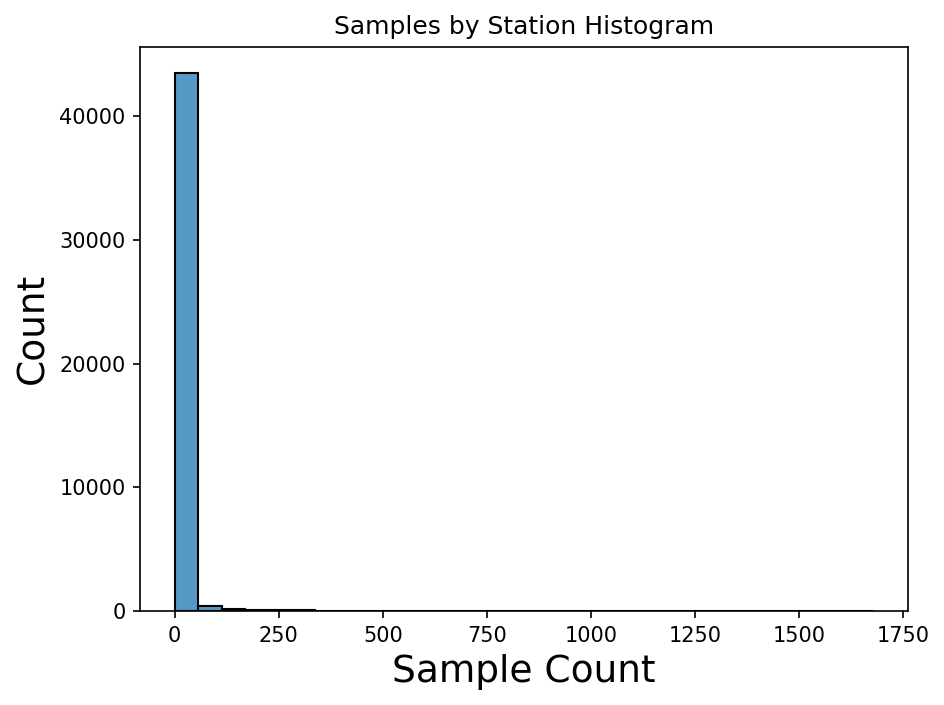

In [8]:
plot = sns.histplot(x=samples_by_station, bins=30)
plot.set(title="Samples by Station Histogram", xlabel="Sample Count");

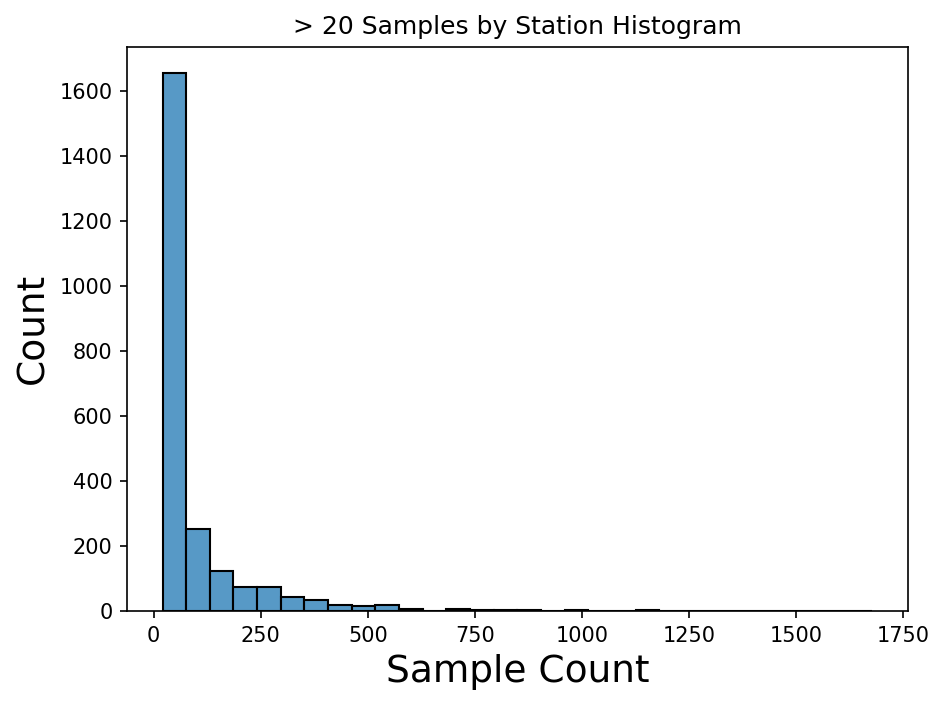

In [9]:
many_samples_by_station = samples_by_station[samples_by_station > 20]
plot = sns.histplot(x=many_samples_by_station, bins=30)
plot.set(title="> 20 Samples by Station Histogram", xlabel="Sample Count");

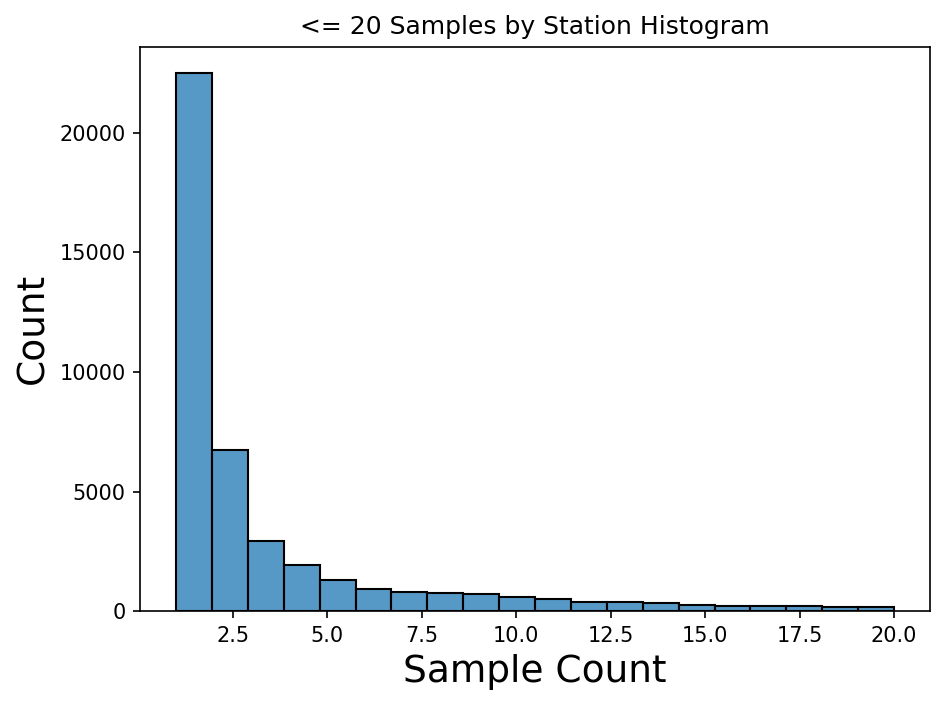

In [10]:
few_samples_by_station = samples_by_station[samples_by_station <= 20]
plot = sns.histplot(x=few_samples_by_station, bins=20)
plot.set(title="<= 20 Samples by Station Histogram", xlabel="Sample Count");

We can see that more than 20k of the stations only have a single sample with a very skewed distribution.

In [11]:
samples_by_station[samples_by_station == 1677]

station_id
12    1677
Name: sample_code, dtype: int64

Station 12 had the most samples at 1677.

In [12]:
df.result.value_counts()

result
< R.L.    832330
.1         62443
2          52669
.01        52441
1          52044
           ...  
1127.8         1
6726           1
217.2          1
6016           1
358.77         1
Name: count, Length: 17201, dtype: int64

The `< R.L.` value indicates the measurement was below the reporting limit.  For our purposes, we should be able to safely substitute this with 0.  There are also values like `< MDL, ...` which indicates the measurement was below the method detection limit.  We can also treat this like 0.  There are some with `DNQ=..., NDL=...` which are "Detected, Not Qualified".  I don't think these can be parsed so we will treat them as 0.  Some have a value of `=` and I have no clue what those mean.  A few have `ND, <...` which I couldn't find any reference to so I will assume are "Not Detected".

In [13]:
df.result = df.result.apply(lambda value: \
    0 if value == "< R.L." or \
    value == "<R.L." or \
    value == "=" or \
    str(value).find("ND,") != -1 or \
    str(value).find("< MDL") != -1 or \
    str(value).find("DNQ=") != -1 \
    else float(value))

Now let us take a look at some odd parameters (duplicate parameters per sample).

In [14]:
df[(df.sample_code == "FSA0505B0042") & (df.parameter == "Dissolved Boron")]

,station_id,station_name,full_station_name,station_number,station_type,latitude,longitude,status,county_name,sample_code,sample_date,sample_depth,sample_depth_units,parameter,result,reporting_limit,units,method_name
1960977,3420,TD CTL3728,TILE DRAIN CTL3728,CTL3728,Other,NaN,NaN,"Public, Review Status Unknown",Merced,FSA0505B0042,05/18/2005 10:15,1.0,Feet,Dissolved Boron,5.6,0.5,mg/L,EPA 200.7 (D)
1960978,3420,TD CTL3728,TILE DRAIN CTL3728,CTL3728,Other,NaN,NaN,"Public, Review Status Unknown",Merced,FSA0505B0042,05/18/2005 10:15,1.0,Feet,Dissolved Boron,0.0,1.0,mg/L,EPA 200.7 (D)


We can see that Dissolved Boron is being reported twice for this sample.  Let us just take the max result for any paramter in a given sample.

In [15]:
df = df[df.groupby(["sample_code", "parameter"], as_index=False).result.transform("max") == df.result].copy()
df.shape

(4537359, 18)

Now let us take a look at the latitude and longitude data.

In [16]:
print(f"Missing latitude: {len(df[df.latitude.isna()])}")
print(f"Missing longitude: {len(df[df.longitude.isna()])}")

Missing latitude: 130890
Missing longitude: 130890


There are 138k rows missing lat/lon data.  We might have to throw this data away, but let us take a closer look first.

In [17]:
df[df.latitude.isna()].station_type.value_counts()

station_type
Other            119140
Surface Water     11672
Groundwater          78
Name: count, dtype: int64

Surface and groundwater are probably important to keep.  We should be able to use supplementary information to approximate lat/lon for the given county.  Let us look more closely at the `Other` station types.

In [18]:
df[df.latitude.isna() & (df.station_type == "Other")].head()

,station_id,station_name,full_station_name,station_number,station_type,latitude,longitude,status,county_name,sample_code,sample_date,sample_depth,sample_depth_units,parameter,result,reporting_limit,units,method_name
653460,769,TD BVS6001,T.D. BVS6001,BVS6001,Other,NaN,NaN,"Public, Review Status Unknown",Fresno,FSA0103B0001,01/07/2003 11:30,0.3,Meters,Dissolved Arsenic,0.0,0.005,mg/L,EPA 200.8 (D)
653461,769,TD BVS6001,T.D. BVS6001,BVS6001,Other,NaN,NaN,"Public, Review Status Unknown",Fresno,FSA0103B0001,01/07/2003 11:30,0.3,Meters,Dissolved Barium,0.0,0.250,mg/L,EPA 200.8 (D)
653462,769,TD BVS6001,T.D. BVS6001,BVS6001,Other,NaN,NaN,"Public, Review Status Unknown",Fresno,FSA0103B0001,01/07/2003 11:30,0.3,Meters,Dissolved Boron,11.3,1.000,mg/L,EPA 200.7 (D)
653463,769,TD BVS6001,T.D. BVS6001,BVS6001,Other,NaN,NaN,"Public, Review Status Unknown",Fresno,FSA0103B0001,01/07/2003 11:30,0.3,Meters,Dissolved Calcium,461.0,10.000,mg/L,EPA 200.7 (D)
653464,769,TD BVS6001,T.D. BVS6001,BVS6001,Other,NaN,NaN,"Public, Review Status Unknown",Fresno,FSA0103B0001,01/07/2003 11:30,0.3,Meters,Dissolved Chloride,632.0,100.000,mg/L,EPA 300.0 28d Hold


They appear to be "Tile Drain" stations (`TD`).  I don't know why they don't have lat/lon, but we will estimate the county lat/lon.

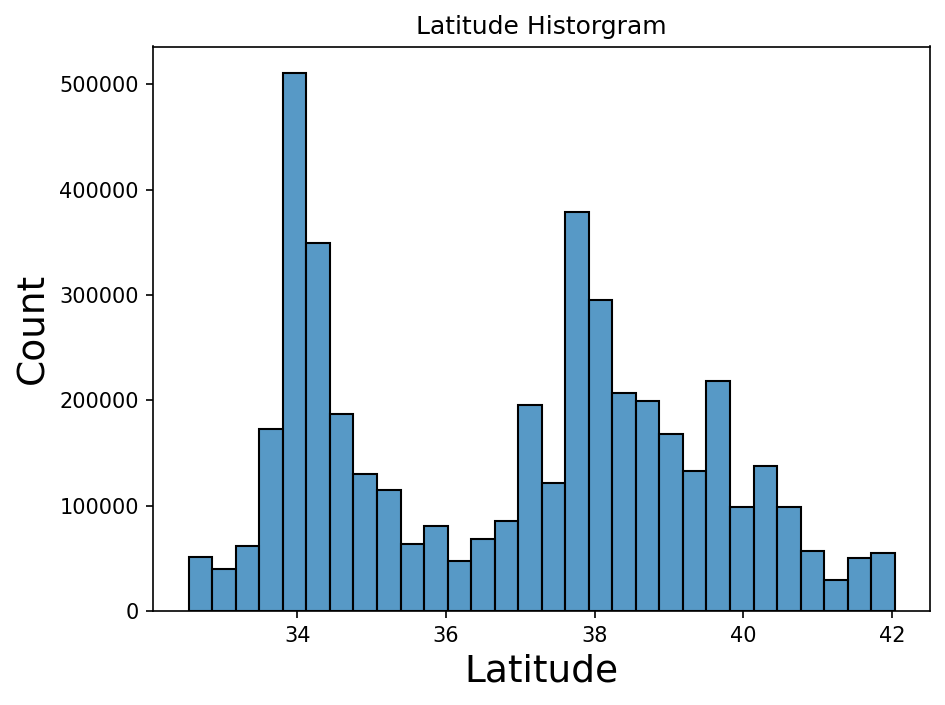

In [19]:
plot = sns.histplot(x=df[~df.latitude.isna()].latitude, bins=30)
plot.set(title="Latitude Historgram", xlabel="Latitude");

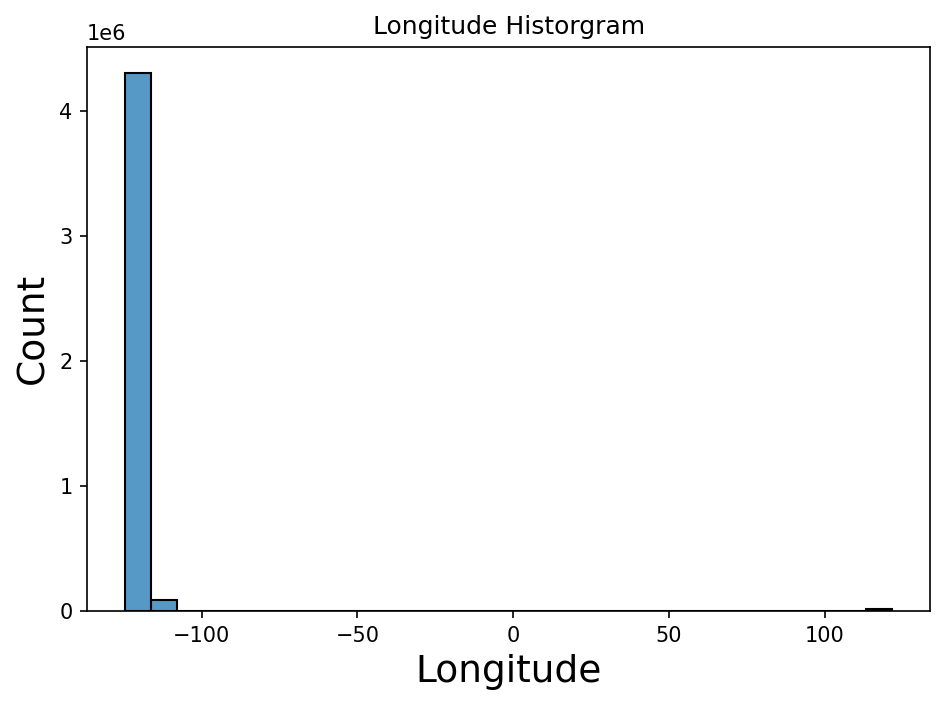

In [20]:
plot = sns.histplot(x=df[~df.longitude.isna()].longitude, bins=30)
plot.set(title="Longitude Historgram", xlabel="Longitude");

We appear to have some bad data.  All of the longitudes should be negative.  There are also some records from Kern county where the longitude is the negative latitude instead.  Let us fix the bad data.

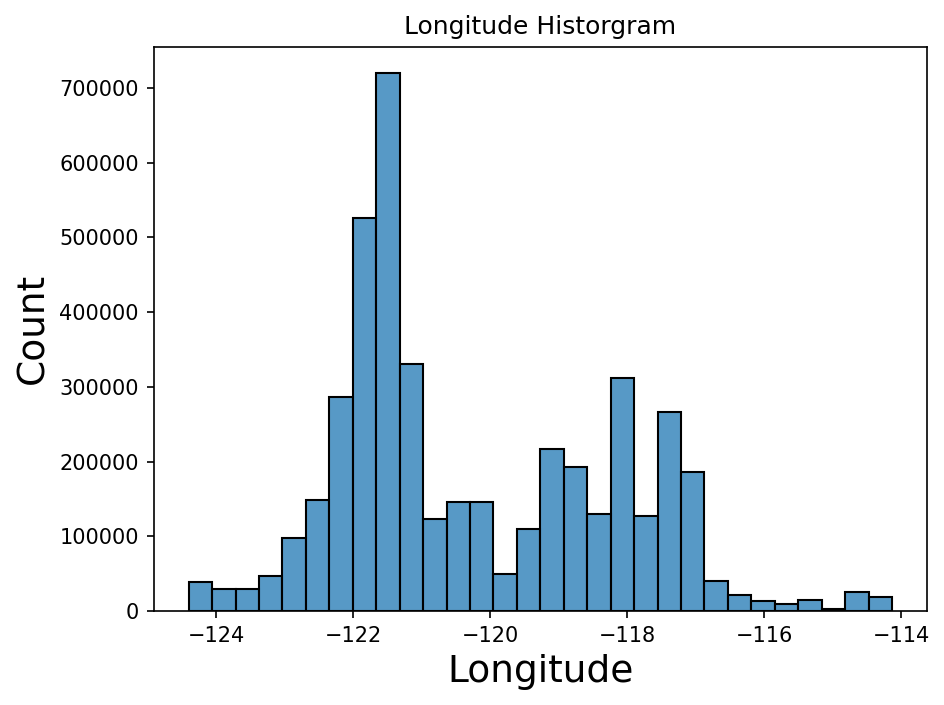

In [21]:
df.longitude = df.longitude.apply(lambda value: -value if value > 0 else (-118.8597 if value > -100 else value))
plot = sns.histplot(x=df[~df.longitude.isna()].longitude, bins=30)
plot.set(title="Longitude Historgram", xlabel="Longitude");

For the remaining missing data, let us just use the average (mean) value of lat/lon for other samples in the same county.

In [22]:
avg_lat_lon_df = df[~df.latitude.isna()].groupby("county_name").agg({ "latitude": "mean", "longitude": "mean" })
with_avg_df = df.merge(avg_lat_lon_df, how="left", left_on="county_name", right_index=True, suffixes=["", "_avg"])
df.latitude = with_avg_df.latitude.combine_first(with_avg_df.latitude_avg)
df.longitude = with_avg_df.longitude.combine_first(with_avg_df.longitude_avg)
print(f"Missing latitude: {len(df[df.latitude.isna()])}")
print(f"Missing longitude: {len(df[df.longitude.isna()])}")

Missing latitude: 0
Missing longitude: 0


## WHO Potability Requirements

The parameters for the samples do not contain a "potability" classification.  We need to figure out a way to generate this classification for labels for our models (a bit of a circular problem).  We will do this by referring to the WHO guidelines for drinking-water quality 4th edition.

https://iris.who.int/bitstream/handle/10665/352532/9789240045064-eng.pdf?sequence=1

In [23]:
df["potable"] = df.apply(is_potable, axis=1).astype("bool")

In [24]:
df.potable.value_counts()

potable
True     4496496
False      40863
Name: count, dtype: int64

By using our helper function (`is_potable`) we can classify each parameter as within the acceptable range (for the parameters we were able to match to the guidelines).  We can see that only 41,051 parameters were classified as "not potable".  This is not a large sample (<1%) and it would be very difficult for an algorithm to "beat the monkey" (which would just always guess potable).

Let us figure out how many different parameters were ever missed.

In [25]:
df[~df.potable].groupby("parameter")["potable"].count()

parameter
1,2-Dibromo-3-chloropropane (DBCP)       1
BHC-gamma (Lindane)                      1
Bromodichloromethane                  3467
Bromoform                              196
Carbon tetrachloride                     1
Chlordane                                2
Chloroform                            2996
Cyanazine                               22
DDT (all isomers)                        8
Dibromochloromethane                   895
Dissolved Antimony                      20
Dissolved Arsenic                     2022
Dissolved Barium                         1
Dissolved Boron                       8765
Dissolved Cadmium                      223
Dissolved Chromium                     138
Dissolved Copper                        94
Dissolved Fluoride                    4037
Dissolved Lead                         328
Dissolved Manganese                   2295
Dissolved Mercury                       97
Dissolved Nickel                        27
Dissolved Nitrate                     8293
D

We can see the top 5 features would be Nitrate, Boron, Fluoride, Manganese, Bromodichloromethane.  There are a handful of parameters that are only bad for a single sample, so I am not sure if any algorithm will be able to pick these up without overfitting.

Next, let us combine the parameters into samples to see how many samples are potable.  We will assume that if any parameter of a sample was not potable then the entire sample was not potable.

In [26]:
sample_df = df.groupby("sample_code").min("potable")
sample_df.potable.value_counts()

potable
True     313671
False     29573
Name: count, dtype: int64

This looks a lot better.  About 10% of the samples are measured as not potable.  Now let us see how many of the stations produced at least one "not potable" sample.

In [27]:
sample_df[~sample_df.potable].station_id.value_counts()

station_id
12       243
3761     215
5051     214
5492     213
5411     189
        ... 
20966      1
25055      1
25054      1
22727      1
5054       1
Name: count, Length: 7977, dtype: int64

We can see that station 12 (the one with the most samples) has the most non-potable samples at 243.  There are a total of 7977 stations that produced at least one non-potable sample which is around 18% - which is also good news.

## Pivot Dataset

Let us pivot the dataset so each row is a sample and each parameter is a column with the result as the value.  We will store the min potability as our label.  We will keep a potable_ column per parameter in case we want to try to predict specific parameter potability separately.

In [28]:
group_features = ["station_id", "latitude", "longitude", "county_name", "sample_code"]
pivot_df = df.pivot_table(index=group_features, columns="parameter", values=["result", "potable"])
pivot_df.columns = [f"potable_{column_names[1]}" if column_names[0] == "potable" else f"param_{column_names[1]}" for column_names in pivot_df.columns.values]
for feature in pivot_df.columns[pivot_df.columns.str.contains("potable_")].values:
    pivot_df[feature] = pivot_df[feature].astype("bool").fillna(True)
for feature in pivot_df.columns[pivot_df.columns.str.contains("param_")].values:
    pivot_df[feature] = pivot_df[feature].fillna(0)
final_df = pivot_df.reset_index().merge(sample_df[["potable"]], how="inner", left_on="sample_code", right_index=True)

In [29]:
final_df.head()

,station_id,latitude,longitude,county_name,sample_code,potable_(Aminomethyl)phosphonic acid,"potable_1,1,1,2-Tetrachloroethane","potable_1,1,1-Trichloroethane","potable_1,1,2,2-Tetrachloroethane","potable_1,1,2-Trichloroethane",...,"param_p,p'-DDE","param_p,p'-DDT",param_p-Xylene,param_pH,"param_s,s,s-Tributyl Phosphorotrithioate (DEF)",param_sec-Butylbenzene,param_tert-Butylbenzene,"param_trans-1,2-Dichloroethene","param_trans-1,3-Dichloropropene",potable
0,1,38.5596,-121.4169,Sacramento,C0114B0005,True,True,True,True,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
1,1,38.5596,-121.4169,Sacramento,C0115B0005,True,True,True,True,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
2,1,38.5596,-121.4169,Sacramento,C0116B0005,True,True,True,True,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
3,1,38.5596,-121.4169,Sacramento,C0117B0081,True,True,True,True,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
4,1,38.5596,-121.4169,Sacramento,C0118B0005,True,True,True,True,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True


In [30]:
final_df.potable.value_counts()

potable
True     313671
False     29573
Name: count, dtype: int64

In [31]:
final_df.station_id.nunique()

44279

In [32]:
final_df["potable_Dissolved Boron"].value_counts()

potable_Dissolved Boron
True     334480
False      8764
Name: count, dtype: int64

In [33]:
final_df.to_feather("potability.feather")